In [1]:
# Importer les librairies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
# Etape 1 : Importer le dataset
dataset_test = pd.read_csv('test.csv')
dataset_train = pd.read_csv('train.csv')

In [3]:
dataset_train

,id,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached_on_Time
0,1,D,Road,4,3,179,3,low,F,3,5495,1
1,2,F,Ship,4,4,275,5,medium,M,5,1117,0
2,3,F,Ship,6,2,286,4,medium,M,6,1556,1
3,4,F,Ship,4,1,254,5,low,F,7,1003,0
4,5,F,Road,3,4,245,4,low,M,4,5186,1
...,...,...,...,...,...,...,...,...,...,...,...,...
7694,7695,C,Flight,5,2,232,2,medium,M,24,2174,1
7695,7696,C,Ship,3,4,169,4,medium,F,32,1245,1
7696,7697,C,Road,4,3,225,3,low,F,62,2587,1
7697,7698,B,Ship,3,2,211,6,low,F,2,4417,0


In [4]:
dataset_test

,id,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
0,1,D,Ship,5,3,250,2,low,F,14,2064
1,2,F,Road,5,4,229,2,medium,F,10,5001
2,3,C,Ship,4,1,270,4,medium,F,64,3312
3,4,F,Flight,3,2,263,3,low,F,57,2113
4,5,F,Ship,6,4,287,4,low,F,5,1972
...,...,...,...,...,...,...,...,...,...,...,...
3295,3296,D,Flight,4,2,136,3,low,F,65,1962
3296,3297,F,Road,3,5,241,3,low,F,5,4861
3297,3298,F,Ship,4,3,235,3,medium,F,4,5748
3298,3299,B,Flight,3,2,152,3,medium,F,7,4244


In [5]:
dataset_train.drop(columns = ['id'], inplace=True);
column_names = list(dataset_train.columns)
column_names

['Warehouse_block',
 'Mode_of_Shipment',
 'Customer_care_calls',
 'Customer_rating',
 'Cost_of_the_Product',
 'Prior_purchases',
 'Product_importance',
 'Gender',
 'Discount_offered',
 'Weight_in_gms',
 'Reached_on_Time']

In [6]:
dataset_train

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached_on_Time
0,D,Road,4,3,179,3,low,F,3,5495,1
1,F,Ship,4,4,275,5,medium,M,5,1117,0
2,F,Ship,6,2,286,4,medium,M,6,1556,1
3,F,Ship,4,1,254,5,low,F,7,1003,0
4,F,Road,3,4,245,4,low,M,4,5186,1
...,...,...,...,...,...,...,...,...,...,...,...
7694,C,Flight,5,2,232,2,medium,M,24,2174,1
7695,C,Ship,3,4,169,4,medium,F,32,1245,1
7696,C,Road,4,3,225,3,low,F,62,2587,1
7697,B,Ship,3,2,211,6,low,F,2,4417,0


In [7]:
dataset_test

,id,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
0,1,D,Ship,5,3,250,2,low,F,14,2064
1,2,F,Road,5,4,229,2,medium,F,10,5001
2,3,C,Ship,4,1,270,4,medium,F,64,3312
3,4,F,Flight,3,2,263,3,low,F,57,2113
4,5,F,Ship,6,4,287,4,low,F,5,1972
...,...,...,...,...,...,...,...,...,...,...,...
3295,3296,D,Flight,4,2,136,3,low,F,65,1962
3296,3297,F,Road,3,5,241,3,low,F,5,4861
3297,3298,F,Ship,4,3,235,3,medium,F,4,5748
3298,3299,B,Flight,3,2,152,3,medium,F,7,4244


In [8]:
print(dataset_train.Gender.unique())
print(dataset_train.Mode_of_Shipment.unique())
print(dataset_train.Product_importance.unique())
print(dataset_train.Warehouse_block.unique())



['F' 'M']
['Road' 'Ship' 'Flight']
['low' 'medium' 'high']
['D' 'F' 'B' 'C' 'A']


In [9]:
dataset_train.Warehouse_block = dataset_train.Warehouse_block.map({'A': 1, 'B': 2, 'C': 3,'D': 4, 'F': 5})
dataset_train.Mode_of_Shipment = dataset_train.Mode_of_Shipment.map({'Road': 1, 'Ship': 2, 'Flight': 3})
dataset_train.Product_importance = dataset_train.Product_importance.map({'low': 1, 'medium': 2, 'high': 3,'D': 4, 'F': 5})
dataset_train.Gender = dataset_train.Gender.map({'M': 1, 'F': 2})

dataset_test.Warehouse_block = dataset_test.Warehouse_block.map({'A': 1, 'B': 2, 'C': 3,'D': 4, 'F': 5})
dataset_test.Mode_of_Shipment = dataset_test.Mode_of_Shipment.map({'Road': 1, 'Ship': 2, 'Flight': 3})
dataset_test.Product_importance = dataset_test.Product_importance.map({'low': 1, 'medium': 2, 'high': 3,'D': 4, 'F': 5})
dataset_test.Gender = dataset_test.Gender.map({'M': 1, 'F': 2})

dataset_train

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached_on_Time
0,4,1,4,3,179,3,1,2,3,5495,1
1,5,2,4,4,275,5,2,1,5,1117,0
2,5,2,6,2,286,4,2,1,6,1556,1
3,5,2,4,1,254,5,1,2,7,1003,0
4,5,1,3,4,245,4,1,1,4,5186,1
...,...,...,...,...,...,...,...,...,...,...,...
7694,3,3,5,2,232,2,2,1,24,2174,1
7695,3,2,3,4,169,4,2,2,32,1245,1
7696,3,1,4,3,225,3,1,2,62,2587,1
7697,2,2,3,2,211,6,1,2,2,4417,0


In [10]:
dataset_test

,id,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
0,1,4,2,5,3,250,2,1,2,14,2064
1,2,5,1,5,4,229,2,2,2,10,5001
2,3,3,2,4,1,270,4,2,2,64,3312
3,4,5,3,3,2,263,3,1,2,57,2113
4,5,5,2,6,4,287,4,1,2,5,1972
...,...,...,...,...,...,...,...,...,...,...,...
3295,3296,4,3,4,2,136,3,1,2,65,1962
3296,3297,5,1,3,5,241,3,1,2,5,4861
3297,3298,5,2,4,3,235,3,2,2,4,5748
3298,3299,2,3,3,2,152,3,2,2,7,4244


In [11]:
dataset_train.isna().sum()

Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached_on_Time        0
dtype: int64

In [12]:
dataset_test.isna().sum()

id                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
dtype: int64

In [13]:
y = dataset_train["Reached_on_Time"]
y

0       1
1       0
2       1
3       0
4       1
       ..
7694    1
7695    1
7696    1
7697    0
7698    1
Name: Reached_on_Time, Length: 7699, dtype: int64

In [14]:
#Normaliser les données
import seaborn as sns
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

dataset_train = sc.fit_transform(dataset_train)

In [15]:
#changer l'array en dataframe
dataset_train = pd.DataFrame(dataset_train, columns=column_names)
dataset_train

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached_on_Time
0,0.442517,-1.758324,-0.042671,0.018017,-0.641953,-0.377890,-0.937642,1.004035,-0.636709,1.135566,0.822120
1,1.113569,-0.002736,-0.042671,0.725745,1.353984,0.937378,0.618827,-0.995982,-0.512458,-1.546554,-1.216367
2,1.113569,-0.002736,1.714156,-0.689710,1.582685,0.279744,0.618827,-0.995982,-0.450332,-1.277607,0.822120
3,1.113569,-0.002736,-0.042671,-1.397437,0.917372,0.937378,-0.937642,1.004035,-0.388207,-1.616395,-1.216367
4,1.113569,-1.758324,-0.921085,0.725745,0.730253,0.279744,-0.937642,-0.995982,-0.574584,0.946262,0.822120
...,...,...,...,...,...,...,...,...,...,...,...
7694,-0.228536,1.752852,0.835742,-0.689710,0.459970,-1.035524,0.618827,-0.995982,0.667929,-0.898998,0.822120
7695,-0.228536,-0.002736,-0.921085,0.725745,-0.849863,0.279744,0.618827,1.004035,1.164934,-1.468137,0.822120
7696,-0.228536,-1.758324,-0.042671,0.018017,0.314433,-0.377890,-0.937642,1.004035,3.028704,-0.645979,0.822120
7697,-0.899589,-0.002736,-0.921085,-0.689710,0.023359,1.595012,-0.937642,1.004035,-0.698835,0.475145,-1.216367


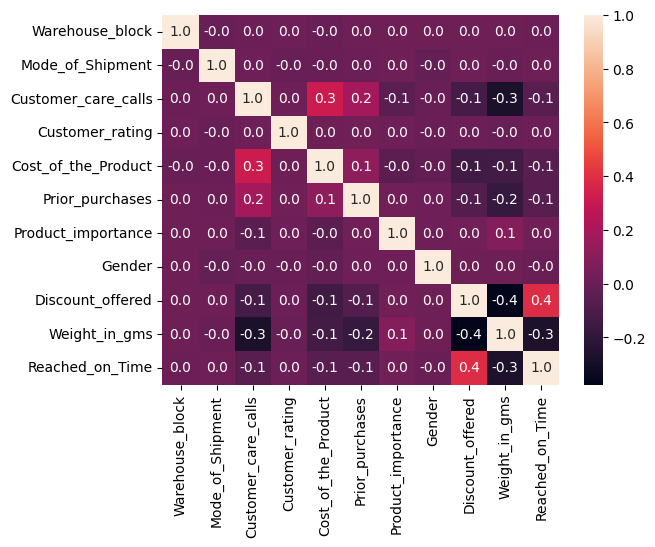

In [16]:
sns.heatmap(dataset_train.corr(), annot=True, fmt='.1f');

In [17]:
predictors = ['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms']
X = dataset_train[predictors]
X

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
0,0.442517,-1.758324,-0.042671,0.018017,-0.641953,-0.377890,-0.937642,1.004035,-0.636709,1.135566
1,1.113569,-0.002736,-0.042671,0.725745,1.353984,0.937378,0.618827,-0.995982,-0.512458,-1.546554
2,1.113569,-0.002736,1.714156,-0.689710,1.582685,0.279744,0.618827,-0.995982,-0.450332,-1.277607
3,1.113569,-0.002736,-0.042671,-1.397437,0.917372,0.937378,-0.937642,1.004035,-0.388207,-1.616395
4,1.113569,-1.758324,-0.921085,0.725745,0.730253,0.279744,-0.937642,-0.995982,-0.574584,0.946262
...,...,...,...,...,...,...,...,...,...,...
7694,-0.228536,1.752852,0.835742,-0.689710,0.459970,-1.035524,0.618827,-0.995982,0.667929,-0.898998
7695,-0.228536,-0.002736,-0.921085,0.725745,-0.849863,0.279744,0.618827,1.004035,1.164934,-1.468137
7696,-0.228536,-1.758324,-0.042671,0.018017,0.314433,-0.377890,-0.937642,1.004035,3.028704,-0.645979
7697,-0.899589,-0.002736,-0.921085,-0.689710,0.023359,1.595012,-0.937642,1.004035,-0.698835,0.475145


In [18]:
# Diviser le dataset entre le Training set et le Test set
from sklearn.linear_model import LogisticRegression

# create an empty list to store the test set accuracies
scores = []

random_states = list(range(10000, 20000))

# loop over the random states and compute the test set accuracy for each one
for rs in random_states:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = rs)
    classifier = LogisticRegression(solver='liblinear')
    classifier.fit(X_train, y_train)
    accuracy = classifier.score(X_test, y_test)
    #print(f"Random state = {rs}, Test set accuracy = {accuracy}")
    scores.append(accuracy)

max_value = max(scores)
max_index = scores.index(max_value)
max_random_state = random_states[max_index]
print("The maximum value is", max_value, "and it is associated with random state", max_random_state)


The maximum value is 0.6766233766233766 and it is associated with random state 13224


In [19]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 18617)
classifier = LogisticRegression(random_state = 42, solver='liblinear')
classifier.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [20]:
dataset_test


,id,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
0,1,4,2,5,3,250,2,1,2,14,2064
1,2,5,1,5,4,229,2,2,2,10,5001
2,3,3,2,4,1,270,4,2,2,64,3312
3,4,5,3,3,2,263,3,1,2,57,2113
4,5,5,2,6,4,287,4,1,2,5,1972
...,...,...,...,...,...,...,...,...,...,...,...
3295,3296,4,3,4,2,136,3,1,2,65,1962
3296,3297,5,1,3,5,241,3,1,2,5,4861
3297,3298,5,2,4,3,235,3,2,2,4,5748
3298,3299,2,3,3,2,152,3,2,2,7,4244


In [21]:
# Vérification en effectuant de nouvelles prédictions
X_test = dataset_test.drop(['id'], axis=1)

y_pred = classifier.predict(X_test)
to_be_submitted = pd.DataFrame({"id":dataset_test.id, "Reached_on_Time":y_pred})
to_be_submitted.to_csv("submission1.csv",index=False)

In [23]:
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

# Transformer les données d'entraînement et de test en utilisant l'ACP
X_test_pca = pca.transform(X_test)

# Entraîner un modèle de régression logistique sur les données transformées
clf = LogisticRegression()
clf.fit(X_train_pca, y_train)

# Évaluer les performances du modèle sur l'ensemble de test
y_pred = clf.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


ValueError: Found input variables with inconsistent numbers of samples: [1540, 3300]

In [ ]:
sample = pd.read_csv("test.csv")

In [ ]:
to_be_submitted = pd.DataFrame({"id":sample.id, "Reached_on_Time":y_pred})
to_be_submitted.to_csv("submission1.csv",index=False)

ValueError: array length 1540 does not match index length 3300

In [ ]:
y_pred.shape

(1540,)

In [ ]:
X_test = pd.read_csv("test.csv")
#preprocessing X_test and train a clf model
pred = clf.predict(X_test)

to_be_submitted = pd.DataFrame({"id"=X_test.id, "Reached_on_Time"=pred)
to_be_submitted.to_csv("sample_submission.csv",index=False)